In [1]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
from pandas.tools.plotting import autocorrelation_plot
from scipy.stats import ks_2samp

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
pipeline = pd.read_csv('C:/Python27/output_improved_AMS.csv')[['Listing ID','Sentiment score']]
airbnb= pd.read_csv('C:/Python27/AirbnbRating.csv')[['Id','Overall']]

In [3]:
# Get the overall ratings for each listing from the pipeline and save 
# them in a new csv file

set1=pipeline.groupby('Listing ID').mean().round(2)
set1.to_csv(path_or_buf='C:/Python27/Pipelineclean1.csv')

In [4]:
# Delete all the rows with a NaN value and save in a new csv. Both the csv will be 
# joined using the command line
# and based on Listing ID

set2 = airbnb.dropna()
set2.to_csv(path_or_buf='C:/Python27/Airbnbclean.csv')

In [5]:
# Read the csv of the merged file

comparison=pd.read_csv('C:/Python27/merged_AMS.csv')
comparison[:3]

,Airbnb,Listing ID,Pipeline
0,5.0,1000126,4.0
1,5.0,1000252,4.0
2,5.0,1000866,4.5


## Comparison of Airbnb star rating and pipeline
For every listing the stars given by pipeline are compared to the stars of Airbnb. Thus, the two values form a combination. All the possible combinations are presented in the table 

In [7]:
# For filling the dataframe
i=5.0
s0=comparison[comparison['Airbnb']==i]
s00=s0['Pipeline'].value_counts()
b=pd.DataFrame({'Airbnb':i, 'Pipeline':s00.index,
                'V_Frequency': s00.values})
i=4.5
s1=comparison[comparison['Airbnb']==i]
s11=s1['Pipeline'].value_counts()
b1=pd.DataFrame({'Airbnb':i, 'Pipeline':s11.index, 
                 'V_Frequency': s11.values})
i=4.0
s2=comparison[comparison['Airbnb']==i]
s22=s2['Pipeline'].value_counts()
b2=pd.DataFrame({'Airbnb':i, 'Pipeline':s22.index,
                 'V_Frequency': s22.values})
i=3.5
s3=comparison[comparison['Airbnb']==i]
s33=s3['Pipeline'].value_counts()
b3=pd.DataFrame({'Airbnb':i, 'Pipeline':s33.index, 
                 'V_Frequency': s33.values})
i=3.0
s4=comparison[comparison['Airbnb']==i]
s44=s4['Pipeline'].value_counts()
b4=pd.DataFrame({'Airbnb':i, 'Pipeline':s44.index, 
                 'V_Frequency': s44.values},index=[12])

stars_compared=pd.concat([b,b1,b2,b3,b4],ignore_index=True)
stars_compared['Percentage']=
((stars_compared['V_Frequency']/stars_compared['V_Frequency'].sum())*100)
stars_compared.columns=['Airbnb','Pipeline','Frequency','Percentage']
stars_compared

,Airbnb,Pipeline,Frequency,Percentage
0,5.0,4.0,650,31.355523
1,5.0,4.5,404,19.488664
2,5.0,3.5,2,0.096479
3,4.5,4.0,686,33.092137
4,4.5,4.5,199,9.599614
5,4.5,3.5,4,0.192957
6,4.5,3.0,1,0.048239
7,4.0,4.0,100,4.823927
8,4.0,4.5,11,0.530632
9,4.0,3.5,7,0.337675


## Visualization of most frequent star values and grouping non-frequent as "others"
Since we have cominations which appear only once or twice in the whole corpus, then we group these into "other". The pie-chart shows the most frequent combinations.

In [8]:
ot=stars_compared[stars_compared['Percentage']<0.55]
other=ot['Percentage'].sum()
other
freq=ot['Frequency'].sum()
main=stars_compared[stars_compared['Percentage']>=0.55]
main.loc[13]=['Other','Other',freq,other]
main

c:\python27\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Airbnb,Pipeline,Frequency,Percentage
0,5,4,650,31.355523
1,5,4.5,404,19.488664
3,4.5,4,686,33.092137
4,4.5,4.5,199,9.599614
7,4,4,100,4.823927
13,Other,Other,34,1.640135


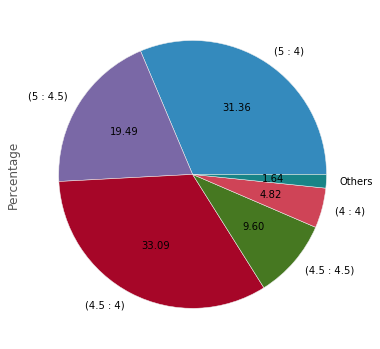

In [9]:
main['Percentage'].plot(kind='pie', labels=['(5 : 4)', '(5 : 4.5)', 
'(4.5 : 4)', '(4.5 : 4.5)', '(4 : 4)', 'Others'], autopct='%.2f', 
                        fontsize=10, figsize=(6, 6))

## The occurence of "rare" combinations
And ere we have the occurrence of non-frequent combinations, all less than 0.55%. Below they are also visualized in a bar chart with their correpsonding frequencies.

In [10]:
ot

,Airbnb,Pipeline,Frequency,Percentage
2,5.0,3.5,2,0.096479
5,4.5,3.5,4,0.192957
6,4.5,3.0,1,0.048239
8,4.0,4.5,11,0.530632
9,4.0,3.5,7,0.337675
10,3.5,4.0,6,0.289436
11,3.5,3.5,2,0.096479
12,3.0,5.0,1,0.048239


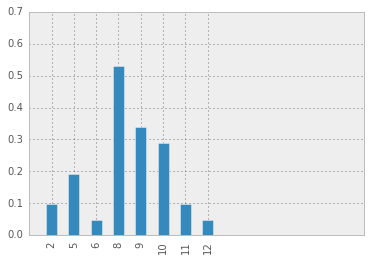

In [11]:
ot['Percentage'].plot(kind='bar',figsize=(6,4))
plt.axis([-1, 14, 0, 0.7])
plt.show()

## How value combination of stars is distributed
The scatter shows how the combinations of stars are distributed. We see only the main outliers (3.0,5.0), (4.5,3.0) and (5.0, 3.5)

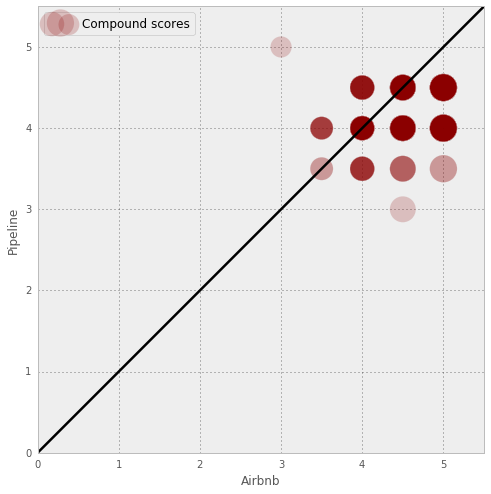

In [12]:
fx = comparison.plot(kind='scatter', x='Airbnb', y='Pipeline', color='DarkRed', 
                     label='Compound scores', s=comparison['Airbnb']*150, 
                     alpha=0.2, figsize=(8,8)).set_xlim(0,8)
line = plt.plot([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
plt.axis([0, 5.5, 0, 5.5])
plt.setp(line, color='Black', linewidth=2.5)
plt.xlabel('Airbnb')
plt.ylabel('Pipeline')
plt.show()

## The frequency for all Airbnb assigned stars
We see that for Airbnb the most assigned value is 5.0 with 50.95 % and also 4.5 with 42.93%.

In [13]:
abnb=stars_compared[['Airbnb','Frequency','Percentage']].groupby('Airbnb').sum()
abnb

,Frequency,Percentage
Airbnb,,
3.0,1,0.048239
3.5,8,0.385914
4.0,118,5.692233
4.5,890,42.932947
5.0,1056,50.940666


[0, 5.5, 0, 80]

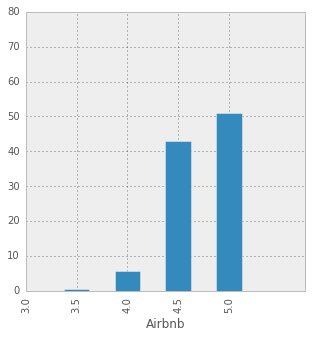

In [14]:
abnb['Percentage'].plot(kind='bar',figsize=(5,5))
plt.axis([0, 5.5, 0, 80])

## The frequency for the stars assigned by the pipeline
for the pipeline things change a bit, as we have the most assigned value 4.0, followed by 4.5

In [15]:
pip=stars_compared[['Pipeline','Frequency','Percentage']].groupby('Pipeline').sum()
pip

,Frequency,Percentage
Pipeline,,
3.0,1,0.048239
3.5,15,0.723589
4.0,1442,69.561023
4.5,614,29.618910
5.0,1,0.048239


[0, 5.5, 0, 80]

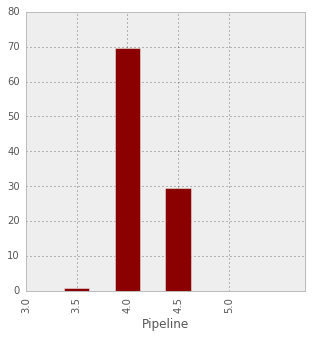

In [16]:
pip['Percentage'].plot(kind='bar',color='DarkRed',figsize=(5,5))
plt.axis([0, 5.5, 0, 80])

## The difference in stars Airbnb and pipeline compared
The difference in stars for every listing is calculated and the frequency of differences is shown in the table. We notice that the highest difference is -2.0, followed by three cases with difference 1.5

In [17]:
comparison['Difference']=comparison['Airbnb']-comparison['Pipeline']
dfr=comparison['Difference'].value_counts()
norm= comparison['Difference'].value_counts(normalize=True)
dfrf=dfr.to_frame()
dfrf['Normalized']=norm
dfrf.columns=['Frequency','Normalized']
dfrf

,Frequency,Normalized
0.5,1097,0.529185
1.0,654,0.315485
0.0,301,0.145200
-0.5,17,0.008201
1.5,3,0.001447
-2.0,1,0.000482


## Get Listing ID for cases with big differences 
We identify the listings with big differences in order to get what is wrong with them.

In [18]:
bg1=comparison[comparison['Difference']>1]
ls1=comparison[comparison['Difference']<-1]
weird=pd.concat([bg1,ls1])
weird_listing=weird['Listing ID']
weird

,Airbnb,Listing ID,Pipeline,Difference
491,5.0,1357971,3.5,1.5
564,4.5,1410370,3.0,1.5
1807,5.0,2606699,3.5,1.5
34,3.0,1022631,5.0,-2.0


## Let's check these cases
Starting from the one with the biggest difference. So only one review... Which has a good sentiment score and makes the whole rating  of pipeline base only on this review

In [19]:
full_content = pd.read_csv('C:/Python27/output_improved_AMS.csv')
full_content[full_content['Listing ID']==1022631]

,Listing ID,Reviewer ID,Review ID,Sentence,Sentiment score,Feature: Accuracy,Feature: Check-in,Feature: Cleanliness,Feature: Communication,Feature: Location,Feature: Value
6515,1022631,9191748,10747505,"Had a lovely break, very cosy home had most co...",0.771737,0.0,0.0,0.0,0.0,0.771737,0.0


# And now the cases with difference 1.5
## Let's see this one
And this other place has no reviews except of one cancelled reservation, for which the pipeline is neutral (3 stars)

In [20]:
full_content[full_content['Listing ID']==1410370]


,Listing ID,Reviewer ID,Review ID,Sentence,Sentiment score,Feature: Accuracy,Feature: Check-in,Feature: Cleanliness,Feature: Communication,Feature: Location,Feature: Value
90721,1410370,4091313,30601951,The reservation was canceled 20 days before ar...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90722,1410370,4091313,30601951,This is an automated posting.,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## And another ...

In [21]:
full_content[full_content['Listing ID']==1357971]

,Listing ID,Reviewer ID,Review ID,Sentence,Sentiment score,Feature: Accuracy,Feature: Check-in,Feature: Cleanliness,Feature: Communication,Feature: Location,Feature: Value
79596,1357971,8022631,7741708,"We had a great time in Josh's Camper, he is ve...",0.733937,0.000000,0.0,0.000000,0.733937,0.000000,0.000000
79597,1357971,8022631,7741708,So I hope we see us again!!,0.582708,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
79598,1357971,8022631,7741708,Thanks for the good time in your Camper!,0.726276,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
79599,1357971,8545449,8548435,A dream came true.... perfect!,0.717725,0.717725,0.0,0.000000,0.000000,0.000000,0.000000
79600,1357971,8545449,8548435,Its a great experience to be living in the cam...,0.624893,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
79601,1357971,8545449,8548435,Almost like forgotten times relived.,0.149440,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
79602,1357971,8545449,8548435,I highly recommend it!!!,0.567441,0.000000,0.0,0.000000,0.000000,0.000000,0.567441
79603,1357971,8545449,8548435,just Perfect.,0.571885,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
79604,1357971,9365972,9053128,"We had a lovely stay in Joshua's camper van, w...",0.883160,0.000000,0.0,0.000000,0.000000,0.000000,0.883160
79605,1357971,13033115,31327563,"Josh is a very flexible,friendly and nice pers...",0.737339,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


## And the last case


In [22]:
full_content[full_content['Listing ID']==2606699]

,Listing ID,Reviewer ID,Review ID,Sentence,Sentiment score,Feature: Accuracy,Feature: Check-in,Feature: Cleanliness,Feature: Communication,Feature: Location,Feature: Value
268229,2606699,738418,17075400,Amazing home and perfect location.,0.817624,0.0,0.0,0.0,0.0,0.817624,0.00000
268230,2606699,738418,17075400,Rob was very friendly and welcoming.,0.469009,0.0,0.0,0.0,0.0,0.000000,0.00000
268231,2606699,738418,17075400,Highly recommend this apartment!,0.474020,0.0,0.0,0.0,0.0,0.000000,0.47402
268232,2606699,16610752,20933169,I stayed at Rob's house over the weekend with ...,0.807398,0.0,0.0,0.0,0.0,0.000000,0.00000
268233,2606699,16610752,20933169,The house is spacious and cosy.,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000
268234,2606699,16610752,20933169,It's in a quiet neighborhood but still close e...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000
268235,2606699,16610752,20933169,"Rob was very nice and accommodating, and even ...",-0.129799,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.00000
268236,2606699,16610752,20933169,I would gladly stay there again.,0.339950,0.0,0.0,0.0,0.0,0.000000,0.00000
268237,2606699,21004608,28894069,"the location was amazing, the flat is little o...",0.726946,0.0,0.0,0.0,0.0,0.726946,0.00000
268238,2606699,21004608,28894069,however there was one bedroom and 2 singles be...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000


## RMSE of differences in two samples

In [23]:
SSD=comparison['Difference'].pow(2).sum()
n=comparison['Difference'].count()
MSE=SSD/n
RMSE=np.sqrt(MSE)
print RMSE.round(3)

0.675


In [24]:
# The common difference between pipeline and Airbnb
bs=comparison['Difference'].mean()
bs

0.57718282682103228

In [25]:
# STANDARD DEVIATION
comparison['Difference'].std()

0.34919291093687588

## Let's now remove half a star from Airbnb values
We saw that the difference of half a star in Airbnb values higher than the pipeline prevails. Therefore known that there is a bias towards high scores in the Airbnb system, we try to substract from all the values half a star.

In [26]:
comparison['RE: Airbnb']=comparison['Airbnb']-0.5
comparison['RE: Difference']=comparison['RE: Airbnb'] - comparison['Pipeline']

In [27]:
dfr1=comparison['RE: Difference'].value_counts()
norm1= comparison['RE: Difference'].value_counts(normalize=True)
dfrf1=dfr1.to_frame()
dfrf1 ['Frequency'] = dfrf['Frequency']
dfrf1['RE: Normalized']=norm1
dfrf1['Normalized']=norm
dfrf1.columns=['RE: Frequency','Frequency','RE: Normalized','Normalized']
dfrf1

,RE: Frequency,Frequency,RE: Normalized,Normalized
0.0,1097,301.0,0.529185,0.145200
0.5,654,1097.0,0.315485,0.529185
-0.5,301,17.0,0.145200,0.008201
-1.0,17,NaN,0.008201,NaN
1.0,3,654.0,0.001447,0.315485
-2.5,1,NaN,0.000482,NaN


## RMSE in the new set
We see that the RMSE is reduced with 47%.

In [28]:
SSD1=comparison['RE: Difference'].pow(2).sum()
MSE_RE=SSD1/n
RMSE_RE=np.sqrt(MSE_RE)
RMSE_RE

0.35753888868532163

In [31]:
(RMSE_RE-RMSE)/RMSE

-0.46995892022441427

## Get the IDs of Listings with less than 3 reviews
Another test is the case of listings with less than 3 reviews, as we said that their sentiment value would not be very reliable. We see that in 213 listings we have less than 3 reviews.

In [32]:
a=full_content[['Listing ID','Review ID']]
a_nodup=a.drop_duplicates()
count=a_nodup.groupby('Listing ID').count()
count['Listing ID']=count.index
d = count[count['Review ID']<3]
less_3 = d[['Listing ID']]
less_3.count()

Listing ID    213
dtype: int64

## Remove from analysis of differences these cases
For having reliable scores we remove these cases from the analysis and then we check again the differences. We see that in the new case the maximal difference will be 1.5 stars in only 2 case. So we have omitted the case with -2 stars difference and 1 case with 1.5 stars difference. The result means that listings with a high number of reviews generate more reliable scores, however since we have in most of the cases more than 3 reviews per listing, it would not directly affect the pipeline.

In [33]:
mutual=comparison[comparison['Listing ID'].isin(less_3['Listing ID'])]
indexes_ID=mutual.index
for i in less_3['Listing ID']:
    new_comparison=comparison.drop(indexes_ID)
new_comparison[:5]

,Airbnb,Listing ID,Pipeline,Difference,RE: Airbnb,RE: Difference
0,5.0,1000126,4.0,1.0,4.5,0.5
1,5.0,1000252,4.0,1.0,4.5,0.5
2,5.0,1000866,4.5,0.5,4.5,0.0
3,4.5,1001885,4.5,0.0,4.0,-0.5
4,4.5,1002180,4.5,0.0,4.0,-0.5


In [34]:
new_comparison['Difference']=new_comparison['Airbnb']-new_comparison['Pipeline']
dfr_new=new_comparison['Difference'].value_counts()
norm_new = new_comparison['Difference'].value_counts(normalize=True)
dfrf_new=dfr_new.to_frame()
dfrf_new['Normalized']=norm_new
dfrf_new.columns=['New_Frequency','New_Normalized']
dfrf_new

,New_Frequency,New_Normalized
0.5,1081,0.530422
1.0,644,0.315996
0.0,294,0.144259
-0.5,17,0.008342
1.5,2,0.000981


## RMSE of the set of listings with 3+ reviews
After calculating the new RSME we see that indeed there is no significant change because the cases with less than 3 reviews are very few.

In [36]:
SSD3=new_comparison['RE: Difference'].pow(2).sum()
MSE_RE_new=SSD3/new_comparison['RE: Difference'].count()
RMSE_RE_new=np.sqrt(MSE_RE_new)
RMSE_RE_new

0.35268492111506988

In [37]:
RMSE_RE_new-RMSE_RE

-0.0048539675702517493